Objetivo específico: Determinar parâmetros gerais (n° de animais nascidos, período para nascimento e sexagem) da criação animal no biotério do ICC, total e por linhagem, nos últimos 5 anos; 

Pergunta: Dados dos requisitantes, tipos de uso - associação com linhagens e demanda e tipos de ensaios. 
Necessário ter todas essas linhagens? -  Alessandra Aguiar.

Tipo de uso: Não temos informações sobre os Usuários Externos para qual tipo de uso, é realizada apenas a produção dos animais. Já os usuários internos da pra saber, porém, não pelo software BioterC

Quais são os pedidos externos e linhagens?
Qual tipo de uso para cada linhagem?
Qual período de pedidos para cada linhagem?

Quais são os pedidos internos e as linhagens?
Qual tipo de uso para cada linhagem?
Qual período de pedidos para linhagem?

In [20]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

#Paramentros para os gráficos
plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.rcParams['xtick.labelsize'] = 18 #tamanho da fonte
plt.rcParams['ytick.labelsize'] = 18 #tamanho da fonte


In [2]:
#Dataframe contendo as informações referentes a pedidos

pedido = pd.read_csv('../../tabelas_test/pedido_2019-06-18.csv', index_col='id')
pedido.head()

,solic,mail,lab,exter,ling,num_ani,time,total_time,doses,cep,cep_num_ani,id_orig,caix_est,id_fim,caix_exp,data_inicio,data_solic,data_forn,data_fim
id,,,,,,,,,,,,,,,,,,,
2,Tania,tschepainski@gmail.com,Usuário Externo,x,Balb/c,2,dia,3,2,83050140,666,666,AAA,666,AAA,1421625600,1411391851,666,1411392413
6,Hálisson Tesseroli Miot,halissontm@gmail.com,LPEP,-,Swiss,4,mes,2,5,0000000000,666,16,1-3-2-16,106,4-1-1-106,1412121600,1411583300,1412619416,1418727743
4,Tania,tschepainski@gmail.com,Usuário Externo,.,Balb/c,2,dia,2,2,81300,666,666,AAA,666,AAA,1420070400,1411491911,666,1411491957
5,Claudemir de Souza,claudemir.s@tecpar.br,VIROMOL,-,Swiss,11,dia,30,5,555555,666,14,1-2-7-14,113,NaN,1412899200,1411579273,1412620096,1422037389
7,Camila Oliveira,halissontm@gmail.com,LPEP,-,Balb/c,6,mes,2,5,0000000000,666,50,2-3-1-50,108,4-1-3-108,1412121600,1411583355,1412082161,1418727745


In [3]:
#Verificando a quantidade de animais solicitados de usuários internos.

pedi_soma_int = pedido[pedido['lab'] != 'Usuário Externo']['num_ani'].sum()
print(f'{pedi_soma_int}: animais solicitados internamente')

1608: animais solicitados internamente


In [4]:
#verificando a quantidade de entradas para cada linhagem

pedido['ling'].value_counts()

Balb/c       215
Swiss         82
C57BL/6       37
S129KO        21
C57BL06WT     15
Swiss-2        9
S129WT         6
Swiss-1        3
AG129          2
C3H            2
DBA/1J         1
Name: ling, dtype: int64

In [5]:
pedido['num_ani'].sum()

5776

COMEÇA AQUI

In [6]:
#Criando uma variável para receber o filtro só de usuários internos
pedidos_int = pedido[(pedido['lab'] != 'Usuário Externo') &
              (pedido['lab'] != 'Teste') &
               (pedido['lab'] != 'Imunova')]

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Transformando todas as datas

datas = ['data_inicio', 'data_solic', 'data_forn', 'data_fim']

for d in datas:
    pedidos_int[d] = pd.to_datetime(pedidos_int[d], unit = 's') #indica o formato das datas
    
pedidos_int.head()
#pedidos_int[pedidos_int['ling'] == 'C3H']

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,solic,mail,lab,exter,ling,num_ani,time,total_time,doses,cep,cep_num_ani,id_orig,caix_est,id_fim,caix_exp,data_inicio,data_solic,data_forn,data_fim
id,,,,,,,,,,,,,,,,,,,
6,Hálisson Tesseroli Miot,halissontm@gmail.com,LPEP,-,Swiss,4,mes,2,5,0000000000,666,16,1-3-2-16,106,4-1-1-106,2014-10-01 00:00:00,2014-09-24 18:28:20,2014-10-06 18:16:56,2014-12-16 11:02:23
5,Claudemir de Souza,claudemir.s@tecpar.br,VIROMOL,-,Swiss,11,dia,30,5,555555,666,14,1-2-7-14,113,NaN,2014-10-10 00:00:00,2014-09-24 17:21:13,2014-10-06 18:28:16,2015-01-23 18:23:09
7,Camila Oliveira,halissontm@gmail.com,LPEP,-,Balb/c,6,mes,2,5,0000000000,666,50,2-3-1-50,108,4-1-3-108,2014-10-01 00:00:00,2014-09-24 18:29:15,2014-09-30 13:02:41,2014-12-16 11:02:25
8,Eloise P. G. Slompo,epgslompo@tecpar.br,LPEP,-,Swiss,3,mes,3,5,A confirmar,666,196,5-7-8-196,107,4-1-2-107,2014-10-24 00:00:00,2014-09-26 19:56:40,2014-09-29 19:21:29,2014-12-03 12:23:33
24,Fabíola Barbieri Holetz,biaholetz@gmail.com,LABREG,-,Swiss,2,dia,2,0,LW-15/13,666,701017,1-1-7-7<br />1-1-7-7,1150101115,<br />4-2-3-115,2014-11-28 05:00:00,2014-11-25 19:23:08,2014-12-03 12:14:51,2015-01-23 18:29:01


In [7]:
pedidos_int['ling'].value_counts()

Balb/c     128
Swiss       50
Swiss-2      9
S129KO       7
C57BL/6      3
Swiss-1      3
AG129        2
DBA/1J       1
Name: ling, dtype: int64

In [8]:
len(pedidos_int)

210

In [9]:
pedidos_int['ling'].replace(['Swiss-1', 'Swiss-2'],'Swiss' ,inplace=True)
pedidos_int['ling'].value_counts()

/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Balb/c     128
Swiss       62
S129KO       7
C57BL/6      3
AG129        2
DBA/1J       1
Name: ling, dtype: int64

In [10]:
ped_heter_int = pedidos_int[pedidos_int['ling'] == 'Swiss']['num_ani'].sum()
print(f'{ped_heter_int}: total de animais heterogênicos solicitações internas')

368: total de animais heterogênicos solicitações internas


In [11]:
inte = pedidos_int.groupby('lab')
inte.sum()

,num_ani,total_time,doses,cep_num_ani,id_orig,id_fim
lab,,,,,,
BIOMOLTRIP,224,156,193,22560,6869968961,13190353124
IBMP,10,1,1,490,1950101194,11010112
LABCET,1,1,1,240,666,666
LABGEN,227,347,47,8889,12886005479,4317689676
LABREG,425,998,289,35981,36728317470,21865725303
LBC,98,78,21,6294,8747957126,2043
LBL,21,24,35,4662,36010396,1140101793
LPEP,212,117,153,8430,19382374703,3297589337
VIROMOL,383,286,104,8920,18323399392,10787438370


In [12]:
pedidos_int['lab'].value_counts()

LABREG        60
BIOMOLTRIP    48
VIROMOL       34
LPEP          21
LABGEN        16
LBC           15
LBL            7
LABCET         1
IBMP           1
Name: lab, dtype: int64

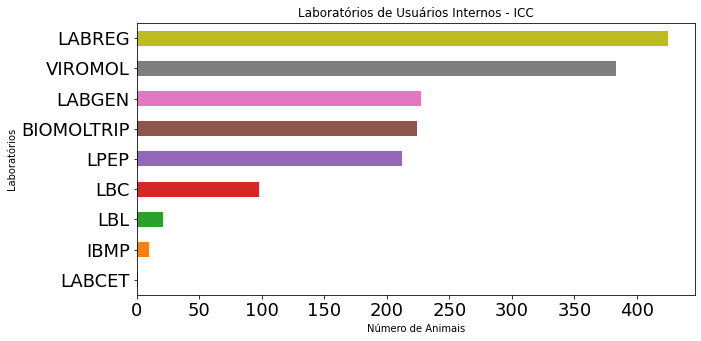

In [13]:
plt.figure(figsize=(10,5))
plt.title('Laboratórios de Usuários Internos - ICC')

plot = pedidos_int.groupby('lab')
plot['num_ani'].sum().sort_values(ascending=True).plot(
kind='barh'
)
plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Laboratórios') #definindo nome do eixo Y
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../../resultados/labs_int_I.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=300, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

In [14]:
ling_mais_soli_ano = ['Balb/c','Swiss','S129KO']

g_ling_mais_ped_in = pedidos_int[pedidos_int['ling'].isin(ling_mais_soli_ano)].groupby('ling')
lin_mais_ped_in = g_ling_mais_ped_in.sum()
lin_mais_ped_in

,num_ani,total_time,doses,cep_num_ani,id_orig,id_fim
ling,,,,,,
Balb/c,962,1302,601,53782,64343007450,29428293888
S129KO,202,26,7,1957,10737819434,2197494220
Swiss,368,608,216,38437,25745721404,22973109512


In [16]:
# plt.figure(figsize=(10,5))
# plt.title('Linhagens com mais Solicitações Internas')

# plot = lin_mais_ped_in.groupby('ling')
# plot['num_ani'].sum().sort_values(ascending=True).plot(
# kind='barh'

# )
# plt.xlabel('Número de Animais') #definindo nome do eixo X
# plt.ylabel('Linhagens') #definindo nome do eixo Y
# #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #Salvando os gráficos
# plt.savefig(
#     fname="../../resultados/animais_mais_int_I.png", #pasta e nome do arquivo onde vai ser salvo
#     bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
#     dpi=150, #numero de pixels da imagem?
#     transparent=True #deixar o gráfico transparente
# )

In [18]:
sns_plot_ped_in = lin_mais_ped_in.groupby('ling').median().sort_values(by='num_ani',ascending=False).reset_index()
sns_plot_ped_in

,ling,num_ani,total_time,doses,cep_num_ani,id_orig,id_fim
0,Balb/c,962,1302,601,53782,64343007450,29428293888
1,Swiss,368,608,216,38437,25745721404,22973109512
2,S129KO,202,26,7,1957,10737819434,2197494220


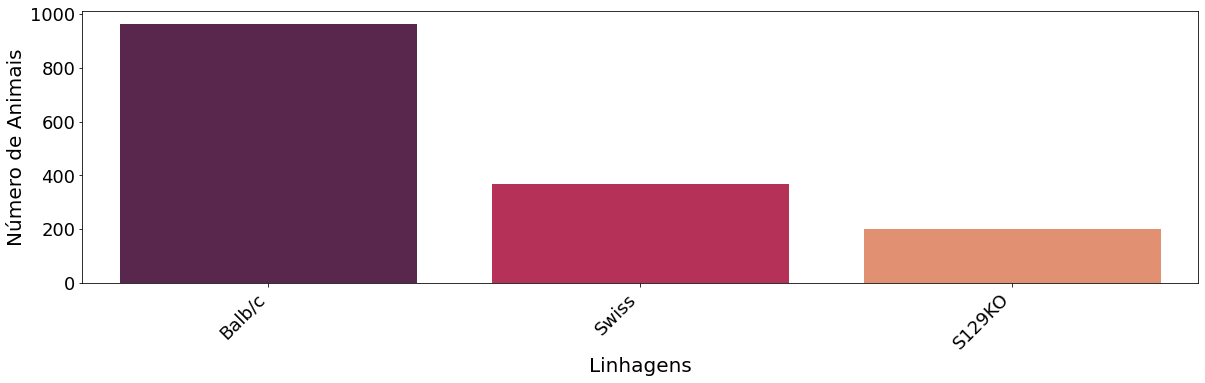

In [21]:
plt.figure(figsize=(20,5))
# plt.title('Strains with more Internal Requests')

sns.barplot(x='ling',
    y='num_ani', palette="rocket",
    data=sns_plot_ped_in).set_xticklabels(
                            rotation=45,
                            horizontalalignment='right',
    labels=sns_plot_ped_in['ling']
)

#plt.legend([str(plot_media) + ' mean mouse/strain', str(plot_mediana) + ' median mouse/strain'])
plt.xlabel('Linhagens') #definindo nome do eixo X
plt.ylabel('Número de Animais') #definindo nome do eixo Y
# #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #Salvando os gráficos
plt.savefig(
    fname="../../resultados/numero_ped_int_DISSERTACAO.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=300, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

In [17]:
# ling_menos_soli_ano = ['AG129', 'C57BL/6', 'DBA/1J' ]

# g_ling_menos_ped_int = pedidos_int[pedidos_int['ling'].isin(ling_menos_soli_ano)].groupby('ling')
# lin_menos_ped_int = g_ling_menos_ped_int.sum()
# lin_menos_ped_int

In [158]:
font = {'family' : 'arial',
        'size'   : '12'}


In [163]:
plt.style.available

['_classic_test',
 'seaborn-deep',
 'seaborn-poster',
 'seaborn-darkgrid',
 'dark_background',
 'seaborn-white',
 'seaborn-dark-palette',
 'fast',
 'seaborn-ticks',
 'seaborn-dark',
 'grayscale',
 'seaborn-whitegrid',
 'seaborn-paper',
 'seaborn-notebook',
 'ggplot',
 'bmh',
 'seaborn-pastel',
 'Solarize_Light2',
 'fivethirtyeight',
 'seaborn-bright',
 'tableau-colorblind10',
 'seaborn-muted',
 'seaborn-colorblind',
 'classic',
 'seaborn',
 'seaborn-talk']

In [188]:
plt.style.use('fivethirtyeight')

Text(0, 0.5, 'Linhagens')

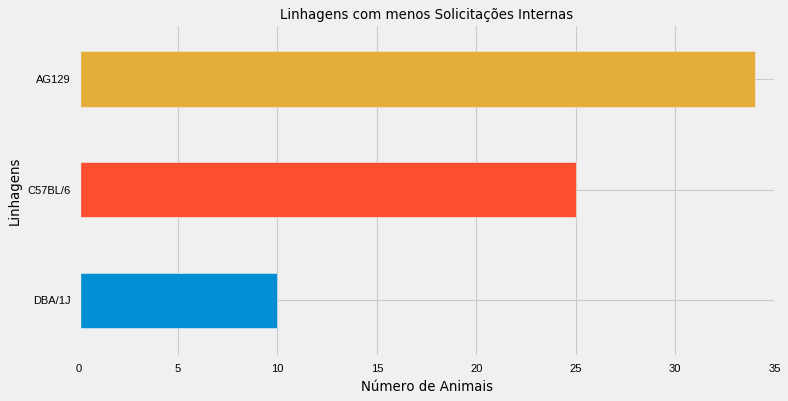

In [189]:
plt.figure(figsize=(10,5))
plt.title('Linhagens com menos Solicitações Internas', **font)

plot = lin_menos_ped_int.groupby('ling')
plot['num_ani'].sum().sort_values(ascending=True).plot(
kind='barh'

)
plt.xlabel('Número de Animais',**font) #definindo nome do eixo X
plt.ylabel('Linhagens', **font) #definindo nome do eixo Y
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #Salvando os gráficos
# plt.savefig(
#     fname="../../resultados/animais_menos_int_I.png", #pasta e nome do arquivo onde vai ser salvo
#     bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
#     dpi=150, #numero de pixels da imagem?
#     transparent=True #deixar o gráfico transparente
# )

In [93]:
pedidos_int[pedidos_int['ling'] == 'Swiss'].tail()

,solic,mail,lab,exter,ling,num_ani,time,total_time,doses,cep,cep_num_ani,id_orig,caix_est,id_fim,caix_exp,data_inicio,data_solic,data_forn,data_fim
id,,,,,,,,,,,,,,,,,,,
284,Caroline de Moraes de Siqueira,Carol.moraes.siqueira@gmail.com,LABREG,-,Swiss,3,dia,45,3,LW-34/16,100,18,1-18,369,7-33,2018-04-23 03:00:00,2018-04-18 10:53:08,2018-04-19 13:57:54,2018-06-21 15:19:35
292,Kamille Schmitt Pereira,kami.schmitt@gmail.com,BIOMOLTRIP,-,Swiss,6,mes,2,4,LW-34/16,100,37010136,1-37<br />1-36,362,7-26,2018-05-08 03:00:00,2018-05-07 11:14:15,2018-05-18 12:54:12,2018-07-26 14:18:56
293,Andreia Akemi Suzukawa,andreia.suzukawa@fiocruz.br,VIROMOL,-,Swiss,16,dia,15,1,LW-2/17,90,2147483647,2-54<br />2-53<br />2-50<,361,7-25,2018-06-04 03:00:00,2018-05-09 14:48:40,2018-05-30 13:48:42,2018-06-28 17:47:35
296,JAQUELINE DE OLIVEIRA ROSA,jaquedeoliveirarosa@gmail.com,BIOMOLTRIP,-,Swiss,6,mes,2,4,LW-34/16,100,34010133,1-34<br />1-33,378,7-42,2018-05-23 03:00:00,2018-05-23 19:00:08,2018-05-29 14:37:25,2018-07-23 17:22:39
331,Flavia Souza Morini,bioflavia@gmail.com,LABGEN,-,Swiss,5,dia,30,4,LW-34/16,100,666,AAA,666,AAA,2018-11-22 02:00:00,2018-11-21 17:49:19,1970-01-01 00:11:06,2018-11-23 18:05:56


In [94]:
ling = pedidos_int[pedidos_int['ling'] == 'AG129']

In [95]:
testa = ling.groupby('lab')
testa.sum()

,num_ani,total_time,doses,cep_num_ani,id_orig,id_fim
lab,,,,,,
VIROMOL,34,42,2,228,1332,1332


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

D: Em quanto tempo em media leva para os animais serem fornecidos para os pedidos?
Acho que seria interessante pra controle pro Giovanny. Pro trabalho não tem muito impacto.

APENAS CASO O GIOVANNY QUEIRA

In [96]:
# #Criada um DataFrame com o período entre acasalamento e nascimento - com outliers (datas day_nasc_acas)
# ped_int_periodo = pd.DataFrame()
# ped_int_periodo = pedidos_int[['data_solic', 'data_forn', 'num_ani', 'ling']]
# ped_int_periodo['day_pedido_int'] = list(map(lambda day_pedido: pedidos_int['data_forn'] - pedidos_int['data_solic'], pedidos_int))[0]
# ped_int_periodo.head()

In [97]:
# #retirando os horários da coluna 'day_acas_sex_day'
# p1 = lambda s: int(str(s).split(' ')[0])                    #Criada uma função única para transforar a serie em string, cortar por espaços na [0]
# p2 = ped_int_periodo['day_pedido_int']                             #Chamando essa coluna na minha dataframe
# l = list(map(p1, p2))                                       #Guardando essas informações numa lista/map para iteração e percorrer a serie de uma só vez
# ped_int_periodo['day_pedido_day'] = l                 #Criando nova coluna com apenas o valor dos dias que vai receber o que tenho na minha lista          
# ped_int_periodo.head()

In [98]:
# #Retirando os outliers da coluna day_nasc_acas_day para verificar o período de acasalamento ao nascimento.
# q1 = ped_int_periodo['day_pedido_int'].quantile(0.25) #filtro para a retirada dos valores discrepantes
# q3 = ped_int_periodo['day_pedido_int'].quantile(0.75)
# iqr = q3 - q1

# ped_int_periodo_sout = ped_int_periodo[(ped_int_periodo['day_pedido_int'] > (q1 - 1.5 * iqr)) & 
#                                        (ped_int_periodo['day_pedido_int'] < (q3 + 1.5 * iqr))]#dataframe


In [99]:
# ped_int_periodo_sout = ped_int_periodo_sout[ped_int_periodo_sout['day_pedido_day'] != 0]
# ped_int_periodo_sout.head()

In [100]:
# group = ped_int_periodo_sout.groupby('ling')
# group.mean()

In [101]:
# #Plotando gráfico do período médio de entrega.

# plt.figure(figsize=(15,10))
# plt.title('Mediana do período entre solicitação e entrega')

# plot = ped_int_periodo_sout.groupby('ling')
# plot['day_pedido_day'].median().sort_values(ascending=True).plot(
# kind='barh'
# )
# plt.xlabel('Dias') #definindo nome do eixo X
# plt.ylabel('Linhagens')

Hipótese de que o período de entrega de animais é menor entre Swiss e Balb/c por ter maior disponibilidade ?
E isso é importante saber?

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Gerando série temporal para criar previsão de solicitações para o próximo ano

SÉRIES TEMPORAIS + MODELO PREDITIVO

In [102]:
#Criando Dataframe para serie temporal

pedido_df = pd.DataFrame(pedidos_int['data_solic'])
pedido_df['ling'] = pedidos_int['ling']
pedido_df['lab'] = pedidos_int['lab']
pedido_df['num_ani'] = pedidos_int['num_ani']
pedido_df['data_inicio'] = pedidos_int['data_inicio']
pedido_df['data_forn'] = pedidos_int['data_forn']
pedido_df['data_fim'] = pedidos_int['data_fim']
pedido_df = pedido_df.set_index('data_solic')
pedido_df.head()

,ling,lab,num_ani,data_inicio,data_forn,data_fim
data_solic,,,,,,
2014-09-24 18:28:20,Swiss,LPEP,4,2014-10-01 00:00:00,2014-10-06 18:16:56,2014-12-16 11:02:23
2014-09-24 17:21:13,Swiss,VIROMOL,11,2014-10-10 00:00:00,2014-10-06 18:28:16,2015-01-23 18:23:09
2014-09-24 18:29:15,Balb/c,LPEP,6,2014-10-01 00:00:00,2014-09-30 13:02:41,2014-12-16 11:02:25
2014-09-26 19:56:40,Swiss,LPEP,3,2014-10-24 00:00:00,2014-09-29 19:21:29,2014-12-03 12:23:33
2014-11-25 19:23:08,Swiss,LABREG,2,2014-11-28 05:00:00,2014-12-03 12:14:51,2015-01-23 18:29:01


In [103]:
# tempo_mes = pedido_df.resample('M').sum()
# tempo_mes.head()

In [104]:
# #Gráfico de série temporal por linhagem

# serie_ling = pedido_df.resample('M').sum() #somando os meses
# decom = seasonal_decompose(serie_ling, freq=12)

# # Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# plt.figure(figsize=(25, 15))

# plt.subplot(4, 1, 1)
# plt.plot(serie_ling, label = 'Nº de solicitações Balb/c', color='red')
# plt.legend(loc = 'best')
# plt.title('Decomposição da Série Temporal: Pedidos Internos') 

# plt.subplot(4, 1, 2)
# plt.plot(decom.trend, label = 'Tendência', color='green')
# plt.legend(loc = 'best')

# plt.subplot(4, 1, 3)
# plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
# plt.legend(loc = 'best')

# plt.subplot(4, 1, 4)
# plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
# plt.legend(loc = 'best')

# plt.xlabel('Período de solicitação')
# plt.tight_layout()


In [105]:
# #Gráfico de série temporal por linhagem

# serie_ped_inte = pedido_df.resample('W').sum() #somando as semanas
# decom = seasonal_decompose(serie_ped_inte, freq=12)

# # Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# plt.figure(figsize=(25, 15))

# plt.subplot(4, 1, 1)
# plt.plot(serie_ped_inte, label = 'Nº de solicitações', color='red')
# plt.legend(loc = 'best')
# plt.title('Decomposição da Série Temporal: Pedidos Internos somando os meses') 

# plt.subplot(4, 1, 2)
# plt.plot(decom.trend, label = 'Tendência', color='green')
# plt.legend(loc = 'best')

# plt.subplot(4, 1, 3)
# plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
# plt.legend(loc = 'best')

# plt.subplot(4, 1, 4)
# plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
# plt.legend(loc = 'best')

# plt.xlabel('Período de solicitação')
# plt.tight_layout()


In [106]:
# from statsmodels.tsa.arima_model import ARIMA

In [107]:
# previsao = pedido_df.resample('M').sum()               #somando mês a mês
# previsao = previsao['num_ani']                                     #para trabalhar com a previsão deve usar uma série, na qual foi escolhida 'num_ani'
# previsao.head()

In [108]:
# pedido_df.index.max()

In [109]:
# for p in range(3):                                    #laço com tamanho 3 para p
#     for q in range(3):                                #laço com tamanho 3 para q
#         for d in range(3):                            #laço com tamanho 3 para d
#             test = (p, q, d)                          #guardando p,q,d em uma variável
#             modelo = ARIMA(previsao, order=test, freq='M')  #modelo ARIMA
#             try:                                      #tente
#                 results = modelo.fit()                #usando a função fit
#                 print(f'({p}, {q}, {d})')             #printando os valores ajustados
#                 print(results.summary())              #resumo dos parâmetros
#                 print()
#             except: 
#                 print('Não')

In [110]:
# teste = ARIMA(previsao, order=(2, 1, 1))                  # dentro de order temos (p, q, d) p n° de termos auto regressivos, q n° da média móvel (muveing average), d n° de diferenças ñ sazonais
# modelo_tr = teste.fit()                             #ajusta o modelo ARIMA (p, d, q)
# modelo_tr.summary()  

In [111]:
# #previsão somando todas as linhagens mês a mês

# prev = modelo_tr.forecast(steps=12)                                            #que irá te retornar a previsão para o período definido, que pode ser dias, meses, anos,
# plt.figure(figsize=(25, 5))
# modelo_tr.plot_predict('2018-06', '2020-06',                                   #decedindo o período de previsão
#                        ax = previsao.plot(),
#                        plot_insample=True
#                       )
# plt.rcParams.update({'font.size': 20}) #tamanho da fonte
# plt.title('Previsão de pedidos internos para dois anos ARIMA(2,1,1)')

# plt.xlabel('Períodos') #definindo nome do eixo X
# plt.ylabel('Número de Animais') #definindo nome do eixo Y
# #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #Salvando os gráficos
# plt.savefig(
#     fname="../../resultados/previsao_sol_inte.png", #pasta e nome do arquivo onde vai ser salvo
#     bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
#     dpi=150, #numero de pixels da imagem?
#     transparent=True #deixar o gráfico transparente
# )

In [112]:
inic = pedidos_int.loc[pedidos_int.index.min(), 'data_solic'] #loc: localizador - localizando a primeira data
fim = pedidos_int.loc[pedidos_int.index.max(), 'data_solic']

Gráfico solicitação de animais usuários internos ICC linhagens mais pedidas ano a ano

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [120]:
# teste_font = {'fontname':'Comic Sans MS'}
from matplotlib import rcParams

plt.rcParams['font.family'] = 'Lucida Grande'
plt.rcParams['font.family'] = 'Arial' 


In [144]:
#plt.style.available///'weight' : 'bold',
font = {'family' : 'arial',
        'size'   : '12'}


In [145]:
csfont = {'fontname':'Arial'}


Text(0, 0.5, 'Número de animais')

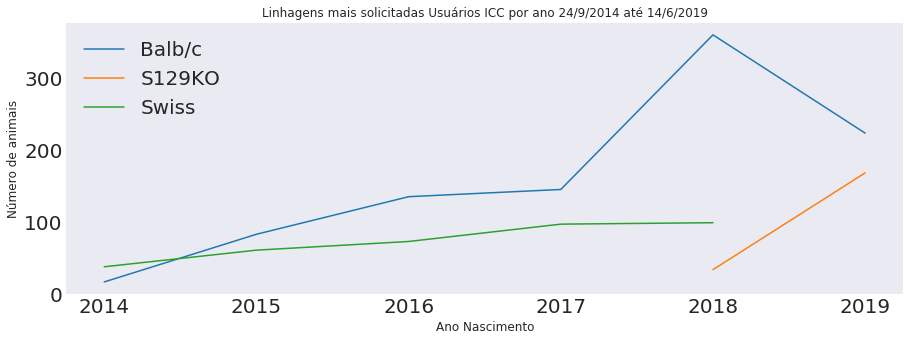

In [148]:
#Gráfico para as linhagens mais solicitadas por ano
ling_mais_soli_ano = ['Balb/c','S129KO','Swiss']

plt.figure(figsize=(15, 5))
for l in ling_mais_soli_ano:
    pedido_df[pedido_df['ling'] == l]['num_ani'].resample('A').sum().plot()
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Editando legendas do gráfico
plt.title(f'Linhagens mais solicitadas Usuários ICC por ano {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}',**font)
plt.legend(ling_mais_soli_ano)
plt.xlabel('Ano Nascimento', **font)
plt.ylabel('Número de animais',**font)
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# plt.savefig(
#     fname="../../resultados/solic_usuariointerno_mais_ano_I.png", #pasta e nome do arquivo onde vai ser salvo
#     bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
#     dpi=150, #numero de pixels da imagem?
#     transparent=True #deixar o gráfico transparente
# )

Gráfico solicitação de animais usuários internos ICC linhagens mais pedidas mês a mês

In [53]:
# #Gráfico de solicitações internas por mês
# ling_mais_soli_mes = ['Balb/c','S129KO','Swiss']

# plt.figure(figsize=(15, 5))
# for c in ling_mais_soli_mes:
#     pedido_df[pedido_df['ling'] == c]['num_ani'].groupby([lambda x: x.month]).sum().plot()

# #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #Editando o gráfico
# plt.title(f'Linhagens mais solicitadas Usuários Internos ICC por mês {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}')
# plt.legend(ling_mais_soli_mes)
# plt.xlabel('Mês Nascimento')
# plt.ylabel('Soma de animais')

# #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #Salvando o gráfico.
# plt.savefig(
#     fname="../resultados/14_pergunta_solic_usuarioexterno_mais_mes.png", #pasta e nome do arquivo onde vai ser salvo
#     bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
#     dpi=150, #numero de pixels da imagem?
#     transparent=True #deixar o gráfico transparente
# )

Gráfico solicitação de animais usuários internos ICC linhagens menos pedidas ano a ano

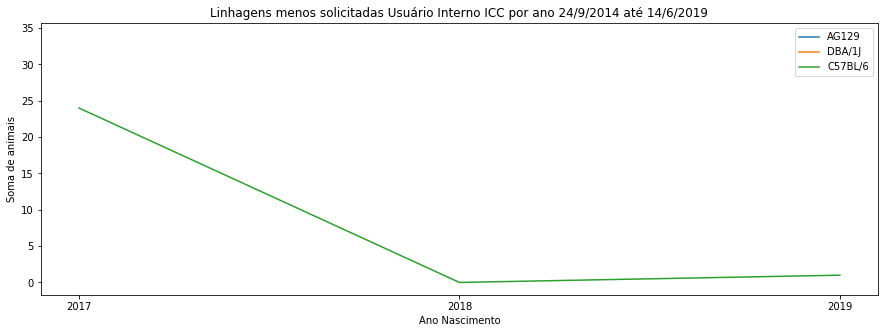

In [54]:
ling_menos_soli_ano = ['AG129', 'DBA/1J', 'C57BL/6' ]

plt.figure(figsize=(15, 5))
for l in ling_menos_soli_ano:
    pedido_df[pedido_df['ling'] == l]['num_ani'].resample('A').sum().plot()
plt.title(f'Linhagens menos solicitadas Usuário Interno ICC por ano {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}')
plt.legend(ling_menos_soli_ano)
plt.xlabel('Ano Nascimento')
plt.ylabel('Soma de animais')
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.savefig(
    fname="../../resultados/solic_usuariointerno_menos_ano_I.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Gráfico solicitação de animais usuários internos ICC linhagens menos pedidas mês a mês

In [ ]:
# ling_menos_soli_mes = ['AG129', 'DBA/1J', 'C57BL/6']

# plt.figure(figsize=(15, 5))
# for c in ling_menos_soli_mes:
#     pedido_df[pedido_df['ling'] == c]['num_ani'].groupby([lambda x: x.month]).sum().plot()
    
# plt.title(f'Linhagens menos solicitadas Usuários Internos ICC por mês {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}')
# plt.legend(ling_menos_soli_mes)
# plt.xlabel('Mês Nascimento')
# plt.ylabel('Soma de animais')
# plt.savefig(
#     fname="../resultados/14_pergunta_solic_usuarioexterno_menos_mes.png", #pasta e nome do arquivo onde vai ser salvo
#     bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
#     dpi=150, #numero de pixels da imagem?
#     transparent=True #deixar o gráfico transparente
# )

Primeiros Resultados: As solicitações Internas dos laboratórios do ICC são inferiores aos pedidos externos. As linhagens mais solicitadas são Balb/c, em seguida Swiss e em terceiro a linhagem S129KO. Já as linhagens menos solicitadas são AG129, C57BL/6 e DBA/1J respectivamente.

Resultado por período anual (linhagens mais pedidas):

Balb/c - por ser uma linhagem de produção de anticorpos monoclonais é a linhagem mais solicitada entre os laboratórios do ICC. Com um aumento de solicitação entre os anos 2016 e 2017, com um pico maior de solicitação em 2018.

Swiss - Teve um período constante de solicitação desde o ano 2014 até 2018, onde parou de ser solicitado. Uma hipótese pode ser que os pesquisadores tenham preferência na linhagem Balb/c, substituindo o uso dos Swiss (produção de policlonal).

S129KO - Maior solicitação no ano de 2018 e 2019.

Resultado por período mensal (linhagens mais pedidas):

Balb/c - Linhagem com solicitações superiores em todos os meses. Apenas em Julho há uma queda de solicitação desta linhagem.

Swiss - Solicitação durante o ano todo, com picos maiores em Março e Setembro e baixa solicitação nos demais meses.

S129KO - Solicitações a partir de Fevereiro, com queda em Junho, resuzindo ainda mais em Outubro.

Resultado por período anual (linhagens menos pedidas):

C57BL/6 - É a unica linhagem solicitada que aparece no gráfico, maior produção em 2017 e quase nenhuma solicitação em 2017 ou 2019.

Resultado por período mensal (linhagens menos pedidas):

C57BL/6 - Maior solicitação em Abril e reduzido de Maio a Julho.

AG129 - Uma Unica solicitação durante o período de Outubro.